# Computer Vision CNNs Notebook

This notebook contains exercises for the computer vision CNNs material.

In [1]:
import tensorflow as tf
import pickle, bz2
from sklearn.model_selection import train_test_split

!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/kth_tips.pbz2 -P ../data


with bz2.BZ2File('../data/kth_tips.pbz2', 'rb') as fd:
    kth_dataset = pickle.load(fd)

X_train, X_test, Y_train, Y_test = train_test_split(kth_dataset['X'], kth_dataset['Y'], random_state=12345)
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

X_train = X_train / 255
X_test = X_test / 255

--2025-03-20 15:17:11--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/kth_tips.pbz2
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/kth_tips.pbz2 [following]
--2025-03-20 15:17:12--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/kth_tips.pbz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26821274 (26M) [application/octet-stream]
Saving to: ‘../data/kth_tips.pbz2.7’

kth_tips.pbz2.7     100%[===================>]  25.58M  --.-KB/s    in 0.1s    

2025-03-20 15:17:12 (213 MB/s) - ‘../data/kth_tips.pbz2.7’ saved [2

# Exercise 0 - Classify Image Dataset with Conventional Neural Network

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def resize(images):
  new_images = []
  for image in images:
    image = image.reshape(40000)
    new_images.append(image)
  return np.array(new_images)

X_train = resize(X_train)
X_test = resize(X_test)
X_train.shape

(607, 40000)

In [16]:
# nn-model aufbauen
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(40000,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.1103 - loss: 10.6101 - val_accuracy: 0.0739 - val_loss: 2.9848
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.1120 - loss: 3.9986 - val_accuracy: 0.0887 - val_loss: 2.3126
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.1119 - loss: 2.4916 - val_accuracy: 0.0887 - val_loss: 2.3222
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.0796 - loss: 2.3759 - val_accuracy: 0.1084 - val_loss: 2.3021
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.1010 - loss: 2.3029 - val_accuracy: 0.1084 - val_loss: 2.3023
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 774ms/step - accuracy: 0.1052 - loss: 2.3025 - val_accuracy: 0.1084 - val_loss: 2.3025
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - accuracy: 0.0905 - loss: 2.3030 - val_accuracy: 0.1084 - val_loss: 2.3027
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.0840 - loss: 2.3034 - val_accuracy:

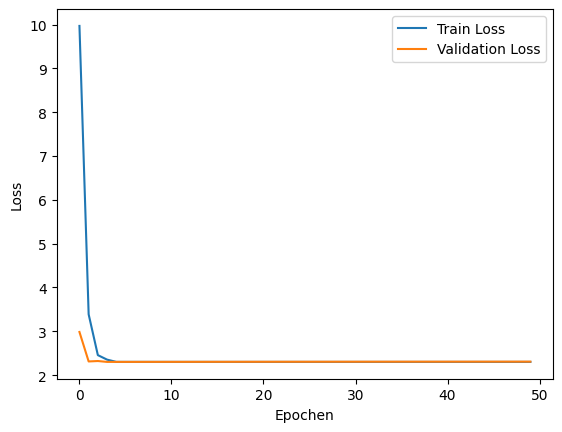

In [17]:
# mit adam-optimizer und categorial-crossentropy compilen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model trainieren
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=50, batch_size=32, verbose=1)

# daten aus training plotten
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Exercise 1 - Classify Image Dataset with Conventional Neural Network

I have provided you with an image dataset (the same we used in the Local Binary Patterns exercise). Your images are in
X_train, X_test while youre labels are in Y_train, Y_test.

Your job is to train a neural network on the pixel values to classify the images. To do so:
* Reshape the images from $(n,200,200)$ to $(n,40000)$
* Create a neural network model using keras
* Train your neural network on the (X_train, Y_train) and validate on the (X_test, Y_test) data.
* Compare your results with the LBP-results (if you have them)
* Explain what happened




In [21]:
# nn-model aufbauen
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'),
])

# mit adam-optimizer und categorial-crossentropy compilen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model trainieren
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=50, batch_size=32, verbose=1)

# daten aus training plotten
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50


ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 40000)

### Exercise 2: Convolutional Layer

In the cell below, I have provided you with a very simple CNN consisting only of a single convolutional layer.
You can access the weights (kernels) of a keras model by accessing the layer with:

```python
kernel_list = cnn.layers[0].get_weights() # This gives us a list of kernels in the layer
```


Experiment with different parameters for ```filters, kernel_size``` and ```input_shape``` and have
a look at the kernels to get a solid understanding of how these kernels a CNN uses look like.

Answer the following questions:
* How are the kernel dimensions influenced by the input dimensions?
* How is the number of parameters in the network influenced by the input dimension, the kernel size and the number of filters?
* Explain and summarize your findings.

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer



cnn = Sequential()
cnn.add(InputLayer(input_shape=(128,128,3)))
cnn.add(Conv2D(filters=1, kernel_size=(3,3)))
cnn.add(Conv2D(filters=2, kernel_size=(3,3)))

cnn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 1)         │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 124, 124, 2)         │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48 (192.00 B)

 Trainable params: 48 (192.00 B)

 Non-trainable params: 0 (0.00 B)

### Exercise 3 - Pooling Layer

Create a convolutional neural network with two convolution layers followed by pooling layers (use either max pooling or average pooling).

Experiment with different values for ```pool_size, strides``` and study how the output shape is affected.
Answer the following questions:
* What is the difference in output size between max pooling and average pooling? Why?
* What is the impact on the receptive field of a convolutional layer following a pooling layer?
* How is the amount of parameters affected by a pooling layer?


### Exercise 4: Flatten and GlobalAveragePooling

In this exercise we will study two methods we can use to transfrom multi-dimensional feature maps to one-dimensional feature maps as used as input for Dense layers.

1. Create a convolution neural network using two convolutional layers.
    * Use a Flatten layer to transform your multi-dimensional feature map to a one-dimensional feature map.
    * Add a Dense output layer for a classification problem with 10 classes.
    * Where is the majority of the weights in your network architecture?
    * How could this influence the training of your network?

2. Create a convolution neural network using two convolutional layers.
    * Use a GlobalAveragePooling2D layer to transform your multi-dimensional feature map to a one-dimensional feature map.
    * Create a network architecture for a classification problem with 10 classes without using a Dense layer.
    * Where is the majority of weights in your network architecture?
    * How could this influence the training of your network?

    


### Exercise 5: Classification using CNNS


In the first exercise in this notebook we already downloaded and prepared the KTH-TIPS dataset we used previously for classification. We saw that using a conventional NN
did not work very well in this scenario.

1. Create a CNN of your choice to train a classifier for the provided dataset.
    * Train on (X_train, Y_train), Validate on (X_test, Y_test) (you can specify validation_data in the ```model.fit()``` function of keras)
2. Compare using Flatten() and GlobalAveragePooling() for feeding your features into Dense layers
    * How does it effect the number of parameters, the accuracy of your results and the time used to train the models?
3. What is the highest accuracy you can reach with the smallest amount of parameters?


